In [1]:
25*6/10

15.0

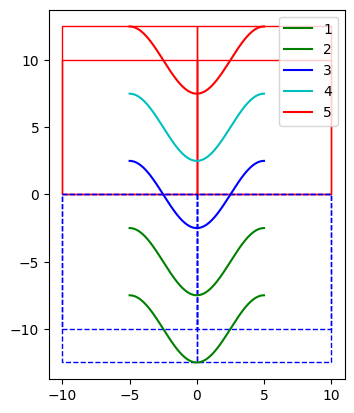

In [2]:
from matplotlib import pyplot as plt
import numpy as np


def rectangle(x, y, width, height, color,linestyle="-"):
    plt.fill([x, x, x + width, x + width], 
             [y, y + height, y + height, y], color="None", edgecolor=color, linestyle=linestyle)

lx = 10

rectangle(0,   0,  lx,  10  , 'red')
rectangle(0,   0, -lx,  10  , 'red')
rectangle(0,   0,  lx, 12.5 , 'red')
rectangle(0,   0, -lx, 12.5 , 'red')



rectangle(0,   0,  lx,  -10  , 'blue',linestyle="--")
rectangle(0,   0, -lx,  -10  , 'blue',linestyle="--")
rectangle(0,   0,  lx, -12.5 , 'blue',linestyle="--")
rectangle(0,   0, -lx, -12.5 , 'blue',linestyle="--")
# aspect ratio

R = 10/4
T = 10

t1 = np.linspace(0, 1, 500)

# =============================================================================
def fparams(t,y0):
    y = 4*R*t - 2*R
    x = -R*np.cos(2*np.pi*y/T) + y0
    return y,x

# x1,y1 = fparams(t1,-4*R)

# y1 = t1*2*R + R
# x1 = -R*np.cos(2*np.pi*y1/T) - 4*R

# plt.plot(x1,y1, 'r',label="1")

x1,y1 = fparams(t1,-4*R)
plt.plot(x1,y1, 'g',label="1")  

x2,y2 = fparams(t1,-2*R)
plt.plot(x2,y2, 'g',label="2")  

x3,y3 = fparams(t1,0)
plt.plot(x3,y3, 'b',label="3")

x4,y4 = fparams(t1,2*R)
plt.plot(x4,y4, 'c',label="4")


x5 = 4*R*t1 - 2*R
y5 = -R*np.cos(2*np.pi*x5/T) + 4*R
# x5,y5 = fparams(t1,4*R)
plt.plot(x5,y5, 'r',label="5")


# y5 = t1*R 
# x5 = -R*np.cos(2*np.pi*y5/T) + 4*R
# plt.plot(x5,y5, 'y' ,label="5")

# y6 = t1*2*R + 3*R
# x6 = -R*np.cos(2*np.pi*y6/T) + 4*R
# plt.plot(x6,y6, 'm' ,label="6")


# =============================================================================


plt.gca().set_aspect('equal', adjustable='box')
plt.legend()

In [3]:
from gmshtools.CircRect6 import CircRect


In [4]:
import gmsh 

gmsh.initialize()

gmsh.model.add("t1")

# cilindro
Ly = 25
Lx = 60
tn  = 3.0
tl = 0.5
r  = 0.32

A = np.pi*r**2

factor = 2.2
rx = factor*r 
ry = (1/factor)*r

R = 10/6
nx_fibres = 6

lx = 10

z0 = tn/2
dx = 0.1 
dz = 0.1

hx = R
hz = tl
Lz = 2*(3*hz + z0) 

def CreateCylinder_Lxx(x0,z0):

    ellipse_1 = CircRect(x0, -Ly/2, z0, 
                         rx, ry, 
                         [0,1,0] ,            # vec_z 
                         [1,0,0])             # vec_x
    
    ellipse_2 = CircRect(x0, +Ly/2, z0,
                            rx, ry, 
                            [0,1,0] ,            # vec_z 
                            [1,0,0])             # vec_x
    gmsh.model.occ.synchronize()

    thrusection = gmsh.model.occ.addThruSections([ellipse_1, ellipse_2])

    gmsh.model.occ.synchronize()

    return thrusection[0][1]

def CreateCylinder_Lyy(y0,z0):
    
    ellipse_1 = CircRect(-lx/2, y0, z0,
                            rx, ry, 
                            [1,0,0] ,            # vec_z 
                            [0,1,0])             # vec_x
    
    ellipse_2 = CircRect(lx/2, y0, z0,
                            rx, ry, 
                            [1,0,0] ,            # vec_z 
                            [0,1,0])             # vec_x
    
    gmsh.model.occ.synchronize()



    thrusection = gmsh.model.occ.addThruSections([ellipse_1, ellipse_2])

    gmsh.model.occ.synchronize()

    return thrusection[0][1]

FM1_list = []


In [5]:

from gmshtools.CreateYarnRect import CreateYarnRect

trajs_mid = [ [x1,y1],
              [x2,y2],
              [x3,y3],
              [x4,y4],
              [x5,y5]]

for itraj_2D in trajs_mid:
    trajs = np.array([[itraj_2D[0][i],
                       itraj_2D[1][i], 
                    -z0 - 5*hz/2 ] 
                    for i in range(len(itraj_2D[0]))])

    yarn = CreateYarnRect({"trajs":trajs, 
                    "radius":0.3, 
                    "factor_radius":2.2, 
                    "density":2,
                    "skip_left":2,
                    "skip_right":2,
                    "vec_init":[1,0,0],
                    "vec_end":[1,0,0]})

    FM1_list.append(yarn["volumes"][0][1])
    print("yarn", yarn["volumes"][0][1])
    # gmsh.fltk.run()

yarn 1
yarn 2
yarn 3
yarn 4
yarn 5


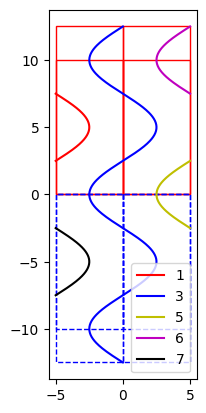

In [6]:
from matplotlib import pyplot as plt
import numpy as np


def rectangle(x, y, width, height, color,linestyle="-"):
    plt.fill([x, x, x + width, x + width], 
             [y, y + height, y + height, y], color="None", edgecolor=color, linestyle=linestyle)


rectangle(0,   0,  lx/2,  10  , 'red')
rectangle(0,   0, -lx/2,  10  , 'red')
rectangle(0,   0,  lx/2, 12.5 , 'red')
rectangle(0,   0, -lx/2, 12.5 , 'red')



rectangle(0,   0,  lx/2,  -10  , 'blue',linestyle="--")
rectangle(0,   0, -lx/2,  -10  , 'blue',linestyle="--")
rectangle(0,   0,  lx/2, -12.5 , 'blue',linestyle="--")
rectangle(0,   0, -lx/2, -12.5 , 'blue',linestyle="--")
# aspect ratio

R = 10/4
T = 10

t1 = np.linspace(0, 1, 500)

# =============================================================================
def fparams(t,y0):
    y = 2*12.5*t-12.5
    x = -R*np.cos(2*np.pi*y/T) + y0
    return x,y


y1 = t1*2*R + R
x1 = -R*np.cos(2*np.pi*y1/T) - 2*R

plt.plot(x1,y1, 'r',label="1")


x3,y3 = fparams(t1,0)
plt.plot(x3,y3, 'b',label="3")


y5 = 2*t1*R -R
x5 = -R*np.cos(2*np.pi*y5/T) + 2*R
plt.plot(x5,y5, 'y' ,label="5")

y6 = t1*2*R + 3*R
x6 = -R*np.cos(2*np.pi*y6/T) + 2*R
plt.plot(x6,y6, 'm' ,label="6")

y7 = t1*2*R - 3*R
x7 = -R*np.cos(2*np.pi*y1/T) - 2*R
plt.plot(x7,y7, 'k' ,label="7")

# =============================================================================


plt.gca().set_aspect('equal', adjustable='box')
plt.legend()

In [7]:

from gmshtools.CreateYarnRect import CreateYarnRect

trajs_mid = [ [x3,y3]]

for itraj_2D in trajs_mid:
    trajs = np.array([[itraj_2D[0][i],
                       itraj_2D[1][i], 
                    -z0 - 3*hz/2 ] 
                    for i in range(len(itraj_2D[0]))])

    yarn = CreateYarnRect({"trajs":trajs, 
                    "radius":0.3, 
                    "factor_radius":2.2, 
                    "density":2.5,
                    "skip_left":2,
                    "skip_right":4,
                    "vec_init":[0,1,0],
                    "vec_end":[0,1,0]})

    FM1_list.append(yarn["volumes"][0][1])
    print("yarn", yarn["volumes"][0][1])

# x1,y1
itraj_2D = [x1,y1]
trajs = np.array([[itraj_2D[0][i],
                    itraj_2D[1][i], 
                -z0 - 3*hz/2 ] 
                for i in range(len(itraj_2D[0]))])

yarn = CreateYarnRect({"trajs":trajs, 
                "radius":0.3, 
                "factor_radius":2.2, 
                "density":2.5,
                "skip_left":2,
                "skip_right":3,
                "vec_init":[1  , 0 , 0],
                "vec_end" :[-1 , 0 , 0]})

FM1_list.append(yarn["volumes"][0][1])
print("yarn", yarn["volumes"][0][1])


# x5,y5
itraj_2D = [x5,y5]
trajs = np.array([[itraj_2D[0][i],
                    itraj_2D[1][i], 
                -z0 - 3*hz/2 ] 
                for i in range(len(itraj_2D[0]))])

yarn = CreateYarnRect({"trajs":trajs, 
                "radius":0.3, 
                "factor_radius":2.2, 
                "density":2.5,
                "skip_left":2,
                "skip_right":2,
                "vec_init":[-1  , 0 , 0],
                "vec_end" :[1 , 0 , 0]})
FM1_list.append(yarn["volumes"][0][1])
print("yarn", yarn["volumes"][0][1])    

# x6,y6
itraj_2D = [x6,y6]
trajs = np.array([[itraj_2D[0][i],
                    itraj_2D[1][i], 
                -z0 - 3*hz/2 ] 
                for i in range(len(itraj_2D[0]))])

yarn = CreateYarnRect({"trajs":trajs,
                "radius":0.3, 
                "factor_radius":2.2, 
                "density":2.5,
                "skip_left":2,
                "skip_right":4,
                "vec_init":[-1 , 0 , 0],
                "vec_end" :[1 , 0 , 0]})


# gmsh.fltk.run()
FM1_list.append(yarn["volumes"][0][1])
print("yarn", yarn["volumes"][0][1])



# x1,y1
itraj_2D = [x7,y7]
trajs = np.array([[itraj_2D[0][i],
                    itraj_2D[1][i], 
                -z0 - 3*hz/2 ] 
                for i in range(len(itraj_2D[0]))])

yarn = CreateYarnRect({"trajs":trajs, 
                "radius":0.3, 
                "factor_radius":2.2, 
                "density":2.5,
                "skip_left":2,
                "skip_right":3,
                "vec_init":[1  , 0 , 0],
                "vec_end" :[-1 , 0 , 0]})

FM1_list.append(yarn["volumes"][0][1])
print("yarn", yarn["volumes"][0][1])


yarn 6
yarn 7
yarn 8
yarn 9
yarn 10


In [8]:
gmsh.fltk.run()

In [9]:
yarn

{'volumes': [(3, 10)]}

In [10]:
# gmsh.fltk.run()

In [11]:

box_cut = gmsh.model.occ.addBox( -Lx/2 ,  -Ly/2, -Lz/2, 
                                  Lx   ,   Ly   , Lz)
gmsh.model.occ.synchronize()
# gmsh.fltk.run()

yarn_cut = gmsh.model.occ.intersect(yarn["volumes"], [(3,box_cut)])
gmsh.model.occ.synchronize()
# gmsh.fltk.run()

# gmsh.fltk.run()

FM1_list.append(yarn_cut[0][0][1])



In [12]:
# gmsh.fltk.run()


In [13]:
yarn["volumes"]

[(3, 10)]

In [14]:
yarn_cut

([(3, 10)], [[(3, 10)], [(3, 10)]])

In [15]:
yarn_cut = FM1_list[0]

box_cut = gmsh.model.occ.addBox( -Lx/2    ,  -Ly/2 , -Lz/2, 
                                 Lx ,  Ly   , Lz)
gmsh.model.occ.synchronize()

yarn_cut = gmsh.model.occ.intersect([(3,yarn_cut)], [(3,box_cut)])
gmsh.model.occ.synchronize()

FM1_list.append(yarn_cut[0][0][1])

FM1_list = FM1_list[1:]

In [16]:
# gmsh.fltk.run()

In [17]:
box_cut

11

In [18]:

gmsh.model.occ.synchronize()
# 
#

nfilaments = int(0.5*25*6/10)

yspan = np.arange(-Ly/2, Ly/2, hx)
yspan = yspan + hx/2

FM2_list = []
for iy in yspan:
    FibreMinus_02 = CreateCylinder_Lyy(iy, -z0 - hz/2 )

    FM2_list.append(FibreMinus_02)

FM2_list.extend(FM1_list)


In [19]:
# for ix in range(-nx_fibres,nx_fibres):
#     FibreMinus_01 = CreateCylinder_Lxx(hx/2 + hx*ix, -z0 - 3*hz/2 )
#     FM1_list.append(FibreMinus_01)

In [20]:

# Identificamos las fibras
fibres_tags = np.concatenate([FM1_list, FM2_list])
f1 = gmsh.model.addPhysicalGroup(3, fibres_tags)
gmsh.model.setPhysicalName(3, f1, "Fibres")


gmsh.model.occ.synchronize()
box_01 = gmsh.model.occ.addBox( -Lx/2  , -Ly/2 , + z0 ,
                                Lx   ,  Ly   ,  3*hz    )

box_02 = gmsh.model.occ.addBox( -lx/2  , -Ly/2 , - z0 ,
                                lx   ,  Ly   ,  -3*hz    )

gmsh.model.occ.synchronize()


box_02_cut = gmsh.model.occ.cut([(3, box_02)], 
                   [(3,i) for i in FM2_list],
                   removeTool=False)

gmsh.model.occ.synchronize()

In [21]:



# # box 
# #
# gmsh.model.occ.synchronize()
# #

box_big_mid = gmsh.model.occ.addBox( -Lx/2   , -Ly/2     , -z0,
                                      Lx   ,  Ly       ,  2*z0    )


box_sup = gmsh.model.occ.addBox( -Lx/2  ,   -Ly/2 , z0 + hz,
                                  Lx    ,    Ly   ,  hz       )

# =============================================================================

# partition with rectangle 

# (0, Ly/2,  z0 + 2*hz)
# (0, Ly/2, -z0 - 2*hz)
# (0, -Ly/2, -z0 - 2*hz)
# (0, -Ly/2,  z0 + 2*hz)

p1_rect = gmsh.model.occ.addPoint(0, Ly/2,  z0 + 3*hz)
p2_rect = gmsh.model.occ.addPoint(0, Ly/2,  z0 +   hz)
p3_rect = gmsh.model.occ.addPoint(0, -Ly/2   ,  z0 +   hz)
p4_rect = gmsh.model.occ.addPoint(0, -Ly/2   ,  z0 + 3*hz)

gmsh.model.occ.synchronize()

l1 =  gmsh.model.occ.addLine(p1_rect, p2_rect)
l2 =  gmsh.model.occ.addLine(p2_rect, p3_rect)
l3 =  gmsh.model.occ.addLine(p3_rect, p4_rect)
l4 =  gmsh.model.occ.addLine(p4_rect, p1_rect)

gmsh.model.occ.synchronize()

ll = gmsh.model.occ.addCurveLoop([l1,l2,l3,l4])
gmsh.model.occ.synchronize()

ss = gmsh.model.occ.addPlaneSurface([ll])
gmsh.model.occ.synchronize()

# gmsh.fltk.run()

box_sup = gmsh.model.occ.fragment([(3,box_sup)], [(2,ss)])
gmsh.model.occ.synchronize()
# =============================================================================

box_inf = gmsh.model.occ.addBox( -Lx/2 , -Ly/2     , -z0 - hz,
                                 Lx    ,  Ly       ,  -hz       )

gmsh.model.occ.synchronize()
volumes = gmsh.model.getEntities(3)



box_big = gmsh.model.occ.addBox( -Lx/2     ,  -Ly/2      , -Lz/2,
                                 Lx  ,   Ly        ,  Lz    )

gmsh.model.occ.synchronize()

# cut box_big - volumes
box_big = gmsh.model.occ.fragment([(3,box_big)], volumes)



gmsh.model.occ.synchronize()


# buscar la caja que tiene como media z= 0


In [22]:
p1_rect = gmsh.model.occ.addPoint(0, Ly/2,  z0 + 3*hz)
p2_rect = gmsh.model.occ.addPoint(0, Ly/2,  z0 +   hz)
p3_rect = gmsh.model.occ.addPoint(0, -Ly/2   ,  z0 +   hz)
p4_rect = gmsh.model.occ.addPoint(0, -Ly/2   ,  z0 + 3*hz)

gmsh.model.occ.synchronize()

l1 =  gmsh.model.occ.addLine(p1_rect, p2_rect)
l2 =  gmsh.model.occ.addLine(p2_rect, p3_rect)
l3 =  gmsh.model.occ.addLine(p3_rect, p4_rect)
l4 =  gmsh.model.occ.addLine(p4_rect, p1_rect)

gmsh.model.occ.synchronize()

ll = gmsh.model.occ.addCurveLoop([l1,l2,l3,l4])
gmsh.model.occ.synchronize()

ss = gmsh.model.occ.addPlaneSurface([ll])
gmsh.model.occ.synchronize()

# 
volumes = gmsh.model.getEntities(3)
com = [ gmsh.model.occ.getCenterOfMass(3,i[1]) for i in volumes]
com = np.array(com)
z_unique = np.unique(com[:,2])
z_unique = np.round(z_unique, 2)
z_max = np.max(z_unique)

volume_layer_max  = [ volumes[i] for i in range(len(volumes)) if com[i,2] == z_max]


# fragment volume_layer_max - ss 
gmsh.model.occ.fragment(volume_layer_max, [(2,ss)])

([(3, 47), (3, 48), (2, 2219)], [[(3, 47), (3, 48)], [(2, 2214), (2, 2219)]])

In [23]:
z_max

np.float64(2.75)

In [24]:
gmsh.model.occ.synchronize()
volumes = gmsh.model.getEntities(3)
com = [ gmsh.model.occ.getCenterOfMass(3, i[1]) 
       for i in volumes ]
#encontart volumenes con yCOM > 12.5
volumes = [volumes[i] for i in range(len(volumes)) if com[i][1] > 12.5]
# eliminar volumenes
gmsh.model.occ.remove([i for i in volumes],recursive=True)
gmsh.model.occ.synchronize()

In [25]:
volumes

[(3, 44), (3, 45), (3, 46)]

In [26]:
# gmsh.fltk.run()


In [27]:
# Identificamos el nucleo
# Este es el volumen con menor valor de z en valor absoluto
volumes = gmsh.model.getEntities(3)
com = [ gmsh.model.occ.getCenterOfMass(3, i[1]) 
       for i in volumes ]


sort_com_index = np.argsort(np.abs(np.array(com)[:,2]))

id_nucleo = volumes[sort_com_index[0]][1]
# physical group
f2 = gmsh.model.addPhysicalGroup(3, [id_nucleo])
gmsh.model.setPhysicalName(3, f2, "Nucleo")
# 
gmsh.model.occ.synchronize()

In [28]:


# Selecionamos todos los volumenes que no sean ni fibras ni nucleo
resina = [ i[1] for i in volumes if i[1] != id_nucleo ]
resina = [ i for i in resina if i not in fibres_tags]

# sort by x
com = [ gmsh.model.occ.getCenterOfMass(3, i) 
       for i in resina ]

# remove z>0 

resina = [resina[i] for i in range(len(com)) if com[i][2] < 0]
com = [com[i] for i in range(len(com)) if com[i][2] < 0]

sort_com_index = np.argsort(np.sqrt((np.array(com)[:,0]) **2 + (np.array(com)[:,1])**2))

resina = [resina[i] for i in sort_com_index]

# select solo las z<0 
resina = resina[:3]
com = [com[i] for i in sort_com_index]

In [29]:
np.array(com).round(3)

array([[ 0.000e+00,  0.000e+00, -1.750e+00],
       [-0.000e+00, -1.000e-03, -2.750e+00],
       [ 2.500e-02, -1.500e-01, -2.250e+00],
       [ 0.000e+00,  9.874e+00, -2.750e+00],
       [ 3.506e+00,  9.906e+00, -2.250e+00],
       [ 1.750e+01,  0.000e+00, -2.250e+00],
       [-1.750e+01,  0.000e+00, -2.750e+00],
       [ 1.750e+01,  0.000e+00, -2.750e+00],
       [ 1.750e+01,  0.000e+00, -1.750e+00],
       [-1.750e+01,  0.000e+00, -2.250e+00],
       [-1.750e+01,  0.000e+00, -1.750e+00]])

In [30]:
# gmsh.fltk.run()

In [31]:
resina

[38, 33, 35]

In [32]:
np.array(com)

array([[ 0.00000000e+00,  2.88672255e-15, -1.75000000e+00],
       [-1.08035804e-04, -5.57174834e-04, -2.75000000e+00],
       [ 2.46898538e-02, -1.50189179e-01, -2.25000000e+00],
       [ 3.95991385e-04,  9.87442016e+00, -2.75000000e+00],
       [ 3.50605474e+00,  9.90588780e+00, -2.25000000e+00],
       [ 1.75000000e+01,  3.58095758e-10, -2.25000000e+00],
       [-1.75000000e+01,  2.94076199e-10, -2.75000000e+00],
       [ 1.75000000e+01,  2.94076250e-10, -2.75000000e+00],
       [ 1.75000000e+01,  6.48866206e-16, -1.75000000e+00],
       [-1.75000000e+01,  5.68434189e-17, -2.25000000e+00],
       [-1.75000000e+01,  6.18882723e-16, -1.75000000e+00]])

In [33]:
resina

[38, 33, 35]

In [34]:
# gmsh.fltk.run()

In [35]:
f3 = gmsh.model.addPhysicalGroup(3, resina)
gmsh.model.setPhysicalName(3, f3, "Resina")

In [36]:
resina

[38, 33, 35]

In [37]:
resina

[38, 33, 35]

In [38]:

volumes = gmsh.model.getEntities(3)
volumes = [ i for i in volumes if i[1] not in resina]
volumes = [ i for i in volumes if i[1] not in fibres_tags]
volumes = [ i for i in volumes if i[1] != id_nucleo]


In [39]:
com = [ gmsh.model.occ.getCenterOfMass(3, i[1]) for i in volumes ]
com = np.array(com)
# round 
com = np.round(com, 2)
z_unique = np.unique(abs(com[:,2]))
z_unique

capas_1 = [ volumes[i][1] for i in range(len(volumes)) if abs(com[i][2]) == z_unique[0]]
capas_2 = [ volumes[i][1] for i in range(len(volumes)) if abs(com[i][2]) == z_unique[1]]
capas_3 = [ volumes[i][1] for i in range(len(volumes)) if abs(com[i][2]) == z_unique[2]]

In [40]:
capas_1

[34, 40, 41]

In [41]:
# gmsh.fltk.run()

In [42]:
[ abs(i[2]) for i in com ]

[np.float64(2.25),
 np.float64(2.25),
 np.float64(2.75),
 np.float64(2.25),
 np.float64(1.75),
 np.float64(2.75),
 np.float64(2.75),
 np.float64(2.25),
 np.float64(1.75),
 np.float64(1.75),
 np.float64(2.25),
 np.float64(2.75),
 np.float64(2.75)]

In [43]:




f5 = gmsh.model.addPhysicalGroup(3, capas_1)
gmsh.model.setPhysicalName(3, f5, "CAPAS_1")

f4 = gmsh.model.addPhysicalGroup(3, capas_2)
gmsh.model.setPhysicalName(3, f4, "CAPAS_2")

f6 = gmsh.model.addPhysicalGroup(3, capas_3)
gmsh.model.setPhysicalName(3, f6, "CAPAS_3")
#

In [44]:
# gmsh.fltk.run()



In [45]:
# # set mesh 
# gmsh.option.setNumber("Mesh.CharacteristicLengthMin", 0.25*r)
# gmsh.option.setNumber("Mesh.CharacteristicLengthMax", 4.0*r)


#algorithm
gmsh.option.setNumber("Mesh.Algorithm", 6) # 2: Delaunay, 6: Frontal-Delaunay, 7: Frontal

# gmsh.option.setNumber("Mesh.CharacteristicLengthMin", 0.4*r)
# gmsh.option.setNumber("Mesh.CharacteristicLengthMax", 4.0*r)

# gmsh.option.setNumber("Mesh.MeshSizeFromCurvature", 10) # 20

# gmsh.option.setNumber("Mesh.SmoothRatio", 1.5) # 20

# # gmsh 
#


In [46]:

# field = gmsh.model.mesh.field
# field.add("MathEval", 1)

# THX = "(0.5 + 0.5*Tanh(10*(-x + x0)) )  * (0.5 + 0.5*Tanh(10*(x + x0)) )"

# THZ_MINUS = "( 0.5 + 0.5*Tanh(10*(-z - z0)) )"
# THY = "(0.5 + 0.5*Tanh(10*(y - y0)) )"


# Fz = "1.0 - 0.55 * THX * THZ_MINUS - 0.35 * THY*THZ_MINUS"

# Fz = Fz.replace("THX", THX)
# Fz = Fz.replace("THZ_MINUS", THZ_MINUS)
# Fz = Fz.replace("THY", THY)

# Fz = Fz.replace("y0", str(0.975*Ly/2))
# Fz = Fz.replace("z0", str(z0 - 1))
# Fz = Fz.replace("x0", str(lx/2 + 1))
# field.setString(1, "F", Fz)

# # Aplicar el campo de fondo
# field.setAsBackgroundMesh(1)



In [47]:


def BoxRefine(x1,x2,y1,y2,z1,z2,vin,vout,Thickness=1.0):
    

    field_tag = gmsh.model.mesh.field.add("Box")

    gmsh.model.mesh.field.setNumber(field_tag, "VIn", vin)
    gmsh.model.mesh.field.setNumber(field_tag, "VOut", vout)

    gmsh.model.mesh.field.setNumber(field_tag, "XMin", x1)
    gmsh.model.mesh.field.setNumber(field_tag, "XMax", x2)

    gmsh.model.mesh.field.setNumber(field_tag, "YMin", y1)
    gmsh.model.mesh.field.setNumber(field_tag, "YMax", y2)

    gmsh.model.mesh.field.setNumber(field_tag, "ZMin", z1)
    gmsh.model.mesh.field.setNumber(field_tag, "ZMax", z2)

    # Thickness
    gmsh.model.mesh.field.setNumber(field_tag, "Thickness", Thickness)

    return field_tag

BaseMeshSize = 1.8

field_tag_base = BoxRefine(-Lx/2, Lx/2, 
                           -Ly/2, Ly/2, 
                           -Lz/2, Lz/2,
                            BaseMeshSize, BaseMeshSize)

FineMeshSize = 0.275

eps = 0.25
field_tag_fine = BoxRefine(    -lx/2     , lx/2,
                               -Ly/2     , Ly/2, 
                            -z0 - 3*hz , -z0 - hz + eps ,
                            FineMeshSize, BaseMeshSize,Thickness=2)

BordeMeshSize = 0.12
# # Ly borde 
field_tag_border_1 = BoxRefine(-lx/2    , lx/2 ,
                                -Ly/2   , -0.95*Ly/2,
                               -z0 - 3*hz , -z0 - hz + eps ,
                             BordeMeshSize, BaseMeshSize)

field_tag_border_2 = BoxRefine(-lx/2    , lx/2 ,
                                0.95*Ly/2   , Ly/2,
                               -z0 - 3*hz , -z0 - hz + eps ,
                             BordeMeshSize, BaseMeshSize)
BordeMeshSize = 0.125

field_tag_border_3 = BoxRefine(0.9*lx/2    , lx/2 ,
                                -Ly/2   , Ly/2,
                               -z0 - 3*hz , -z0 - hz + eps ,
                             BordeMeshSize, BaseMeshSize)

field_tag_border_4 = BoxRefine(-lx/2    , -0.9*lx/2 ,
                                -Ly/2   , Ly/2,
                               -z0 - 3*hz , -z0 - hz + eps ,
                             BordeMeshSize, BaseMeshSize)


# # Ly borde BordeMeshSize = 0.35
# BordeMeshSize = 0.30

# field_tag_border_2 = BoxRefine(-lx/2    , lx/2,
#                              -Ly/2 , -0.9*Ly/2,
#                             -z0 - 3*hz , -z0 - hz + eps ,
#                              BordeMeshSize, BaseMeshSize)
# BordeMeshSize = 0.30

# field_tag_border_3 = BoxRefine(0.9*lx/2    , lx/2,
#                                 -Ly/2 , Ly/2,
#                                 -z0 - 3*hz , -z0 - hz + eps ,
#                                 BordeMeshSize, BaseMeshSize)
# BordeMeshSize = 0.35

# field_tag_border_4 = BoxRefine(  0    , eps,
#                                 -Ly/2 , Ly/2,
#                                 -z0 - 3*hz , -z0  ,
#                                 BordeMeshSize, BaseMeshSize)
# # syncro

field_tag_min =  gmsh.model.mesh.field.add("Min")
gmsh.model.mesh.field.setNumbers(field_tag_min, "FieldsList", 
                                [field_tag_base, field_tag_fine,
                                field_tag_border_1, field_tag_border_2,
                                field_tag_border_3, field_tag_border_4])

gmsh.model.mesh.field.setAsBackgroundMesh(field_tag_min)

gmsh.option.setNumber("Mesh.MeshSizeExtendFromBoundary", 0)
gmsh.option.setNumber("Mesh.MeshSizeFromPoints", 0)
gmsh.option.setNumber("Mesh.MeshSizeFromCurvature", 6.5)


In [48]:
field_tag_min

7

In [49]:
# gmsh.write("t1.brep")

In [50]:
gmsh.fltk.run()

In [51]:

gmsh.model.mesh.generate(3)
# optimize
# second order 
gmsh.model.mesh.optimize("Netgen",force=False)
gmsh.model.mesh.setOrder(2)


In [52]:

# recombine 
gmsh.write("t1_large.inp")

In [53]:
E1 = 8000 
E2 = 700 

Ec = 8000

nu = 0.3 
Em = 1000
En = 800


In [54]:
from djccx.inp.inp import  inp 

inp_f = inp("t1_large.inp")

inp_f.remove_by_type(2)

nodes = inp_f.nodes.df

# nodes_sym = nodes.copy()
# nodes_sym = nodes_sym[ nodes_sym["x"] < 1e-3] 

# nset_sym_x = inp_f.CreateNsetFromIds(nodes_sym.index, "sym_x")

# nodes_sym = nodes.copy()
# nodes_sym = nodes_sym[ nodes_sym["y"] < 1e-3] 

# nset_sym_y = inp_f.CreateNsetFromIds(nodes_sym.index, "sym_y")

nodes_fixed = nodes.copy()
nodes_fixed = nodes_fixed[ nodes_fixed["x"] > 0.5*Lx  - 1e-1]
nodes_fixed = nodes_fixed[ nodes_fixed["z"] < -0.5*Lz + 1e-1]

nset_fixed = inp_f.CreateNsetFromIds(nodes_fixed.index, "fixed")

# nodes_fixed_minus = nodes.copy()
# nodes_fixed_minus = nodes_fixed_minus[ nodes_fixed_minus["x"] < -0.5*Lx + 1e-1]
# nodes_fixed_minus = nodes_fixed_minus[ nodes_fixed_minus["z"] < -0.5*Lz + 1e-1]

# nset_fixed_minus = inp_f.CreateNsetFromIds(nodes_fixed_minus.index, "fixed_minus")

nodes_force = nodes.copy()
z_unique = nodes_force["z"].unique()
z_unique = np.sort(z_unique)
nodes_force = nodes_force[ nodes_force["x"]  == 0]
nodes_force = nodes_force[ nodes_force["z"] == z_unique[-1] ]
nset_force = inp_f.CreateNsetFromIds(nodes_force.index, "force")

# materials 
mat_fibras = inp_f.CreateElasticMaterial("FIBRES", Ec, nu)
mat_resina = inp_f.CreateElasticMaterial("RESINA", Em, nu)
mat_capas_1 = inp_f.CreateElasticMaterial("CAPAS_1", E1, nu)
mat_capas_2 = inp_f.CreateElasticMaterial("CAPAS_2", E1, nu)
mat_capas_3 = inp_f.CreateElasticMaterial("CAPAS_3", E2, nu)

mat_nucleo = inp_f.CreateElasticMaterial("NUCLEO", En, nu)


# elsets 
fibres_elset  = inp_f.select("FIBRES","elset")
resina_elset  = inp_f.select("RESINA","elset") 
capas_1_elset = inp_f.select("CAPAS_1","elset")
capas_2_elset = inp_f.select("CAPAS_2","elset")
capas_3_elset = inp_f.select("CAPAS_3","elset")
nucleo_elset  = inp_f.select("NUCLEO","elset")

inp_f.CreateSolidSection( fibres_elset, mat_fibras)
inp_f.CreateSolidSection( resina_elset, mat_resina)
inp_f.CreateSolidSection( capas_1_elset, mat_capas_1)
inp_f.CreateSolidSection( capas_2_elset, mat_capas_2)
inp_f.CreateSolidSection( capas_3_elset, mat_capas_3)
inp_f.CreateSolidSection( nucleo_elset, mat_nucleo)
#

istep = inp_f.CreateStaticStep()
istep.CreateBoundary(nset_fixed,3,0)
disp = 5
istep.CreateBoundary(nset_force, 3, -disp)


inp_f.print("t1_new_large.inp")

In [55]:
nodes_force = nodes.copy()
z_unique = nodes_force["z"].unique()
z_unique = np.sort(z_unique)
nodes_force = nodes_force[ nodes_force["x"]  == 0]
nodes_force = nodes_force[ nodes_force["z"] == z_unique[-1] ]

In [56]:
nodes_force = nodes.copy()
nodes_force

,x,y,z
nid,,,
1,-5.000000,-2.169888,-2.886364
2,-5.000000,-2.169888,-2.613636
3,-3.847796,-2.670759,-2.613636
4,-3.847796,-2.670759,-2.886364
5,-5.000000,-2.500000,-2.613636
...,...,...,...
700981,18.743908,-11.498545,2.622695
700982,28.784865,-2.220638,2.875156
700983,28.389298,11.412658,2.878832


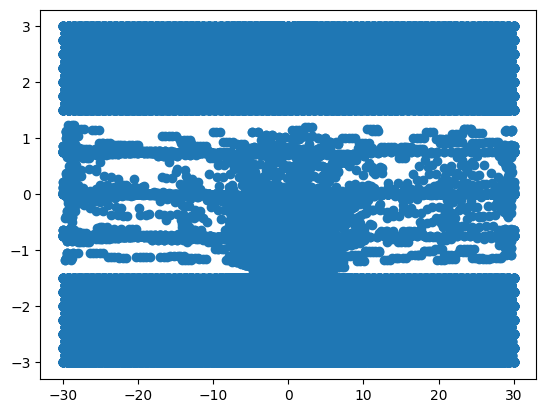

In [57]:
from matplotlib import pyplot as plt

plt.plot(nodes_force["x"], nodes_force["z"], "o")

In [58]:
fibres_elset = inp_f.select("FIBRES","elset")


In [59]:
inp_f.elsets

[Card (*ELSET) :FIBRES,
 Card (*ELSET) :NUCLEO,
 Card (*ELSET) :RESINA,
 Card (*ELSET) :CAPAS_1,
 Card (*ELSET) :CAPAS_2,
 Card (*ELSET) :CAPAS_3]

In [60]:
0.5*Lz - 1e-3

2.999